# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import stats
from scipy.stats import cauchy, norm
import astroML
from astroML import stats as statsml
from astroML.plotting import hist as fancyhist

#setup_text_plots(fontsize=14, usetex=True)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

In [3]:
#Problem 2

<Figure size 432x288 with 0 Axes>

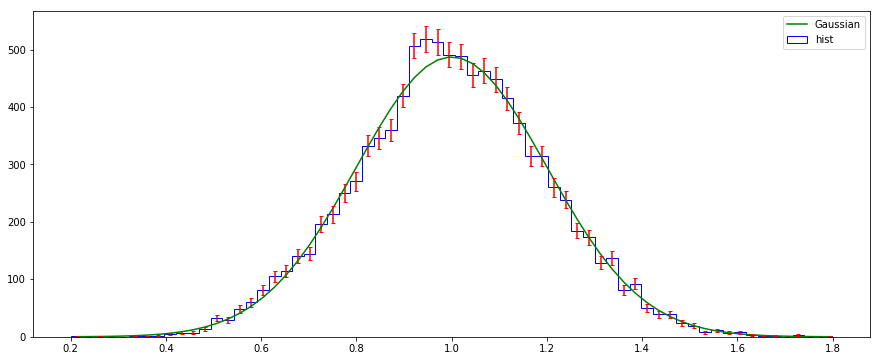

In [4]:
#import matplotlib.mlab as mlab
plt.clf()
mu=1
N=10000
sigma=.2
data=stats.norm(mu, sigma).rvs(N)
sigmag = statsml.sigmaG(data)
x=np.linspace(.25,1.75,1000)


binsize = 2.7*sigmag/(N**(1./3)) #Complete
bins = np.append(np.arange(start=data.min(),stop=data.max(),step=binsize),data.max()) #Complete

ax=plt.figure(figsize=(15,6))

vals, binEdges , patches = plt.hist(data, bins=bins, histtype='step',  label='hist', color='b')

bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

area=np.sum(np.diff(binEdges)*vals)
true_plt=stats.norm(mu, sigma).pdf(bincenters) * area


plt.plot(bincenters, true_plt, label='Gaussian', color='g')



std= np.sqrt(vals) 


plt.errorbar(bincenters, vals, yerr = std , capsize=2, fmt='none', ls = '---', color='red')
plt.legend(loc='best')
prob2data=data

In [5]:
#problem 3

[2.30641734 2.20968481 0.90224661 ... 0.12469465 1.69125479 2.39932844]


<Figure size 432x288 with 0 Axes>

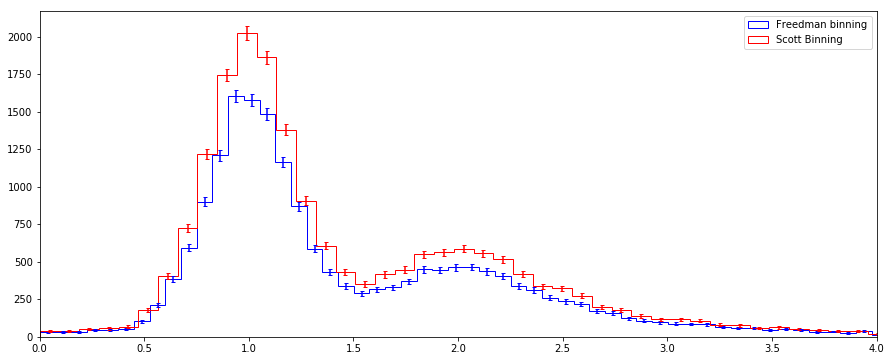

In [6]:
plt.clf()
mu=2
N=10000
gamma=0.5

cauchy_data=stats.cauchy( mu, gamma).rvs(N)
print (cauchy_data)
sigmag = astroML.stats.sigmaG(data)

data=np.concatenate((cauchy_data, prob2data))

#x=np.linspace(,1.75,1000)
#true_plt=stats.norm(loc=mu,scale=sigma).pdf(x)

ax=plt.figure(figsize=(15,6))
vals, binEdges , patches = fancyhist(data, bins='freedman', histtype='step' ,  label='Freedman binning', color='b', range=(0,4))
plt.xlim(0,4)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

std=np.sqrt(vals)
plt.errorbar(bincenters, vals, yerr = std , capsize=2, fmt='none', ls = '---', color='b')

s_vals, s_binEdges , s_patches = fancyhist(data, bins='scott', histtype='step' ,  label='Scott Binning', color='r', range=(0,4))
s_bincenters = 0.5*(s_binEdges[1:]+s_binEdges[:-1])

s_std=np.sqrt(s_vals)

plt.errorbar(s_bincenters, s_vals, yerr = s_std , capsize=2, fmt='none', ls = '---', color='red')
plt.legend(loc='best')
#The bin size with 'scott' calculation results in different hights.  If the plot is not trimmed to a relevant range
#Scott binning is extreme

In [7]:
#Problem 4

/home/steve/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 15)

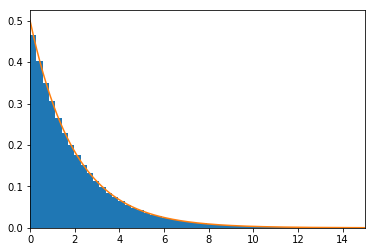

In [8]:
N=2 # Number of draws
mu=0 # Location
sigma =1  # Scale factor
samples=1000000

u = np.linspace(0,15,1000) # Array to sample the space

dist = stats.norm(mu,sigma).rvs(samples) # Complete
sample_sum=[np.sum(np.random.choice(dist, N)**2) for i in range(samples)]
kwargs=dict(bins=100, histtype='stepfilled', normed=True)
plt.hist(sample_sum, **kwargs)

tru_dist=1. / (2**(N/2)*scipy.special.gamma(N/2)) * u**(N/2 - 1) * np.exp(-1*u /2 )

plt.plot(u, tru_dist)
plt.xlim(0,15)

(0, 15)

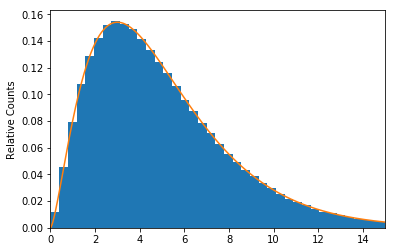

In [9]:
N=5 # Number of draws
#mu=0 # Location
#sigma =1  # Scale factor
samples=1000000

#u = np.linspace(0,15,1000) # Array to sample the space

#dist = stats.norm(mu,sigma).rvs(samples) # Complete
sample_sum=[np.sum(np.random.choice(dist, N)**2) for i in range(samples)]

kwargs=dict(bins=100, histtype='stepfilled', normed=True)
plt.hist(sample_sum, **kwargs)

tru_dist=(1. / (2**(N/2.)*scipy.special.gamma(N/2.))) * u**(N/2. - 1) * np.exp((-1*u )/2 )

plt.plot(u, tru_dist)
plt.ylabel('Relative Counts')
plt.xlim(0,15)